In [48]:
!pip install sklearn

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn import metrics
import re

In [37]:
df_proteomes = pd.read_csv('C:\\Users\\ww\\Documents\\archive\\77_cancer_proteomes_CPTAC_itraq.csv',index_col = 0)
clinical = pd.read_csv('C:\\Users\\ww\Documents\\archive\\clinical_data_breast_cancer.csv',index_col=0)
pam50  = pd.read_csv('C:\\Users\ww\\Documents\\archive\\PAM50_proteins.csv',header = 0)

In [19]:
df_proteomes.drop(['gene_symbol','gene_name'],axis=1,inplace=True) #уберем е нужные столбцы 

In [20]:
df_proteomes

,AO-A12D.01TCGA,C8-A131.01TCGA,AO-A12B.01TCGA,BH-A18Q.02TCGA,C8-A130.02TCGA,C8-A138.03TCGA,E2-A154.03TCGA,C8-A12L.04TCGA,A2-A0EX.04TCGA,AO-A12D.05TCGA,...,AO-A12B.34TCGA,A2-A0SW.35TCGA,AO-A0JL.35TCGA,BH-A0BV.35TCGA,A2-A0YM.36TCGA,BH-A0C7.36TCGA,A2-A0SX.36TCGA,263d3f-I.CPTAC,blcdb9-I.CPTAC,c4155b-C.CPTAC
RefSeq_accession_number,,,,,,,,,,,,,,,,,,,,,
NP_958782,1.096131,2.609943,-0.659828,0.195341,-0.494060,2.765081,0.862659,1.407570,1.185108,1.100688,...,-0.963904,-0.487772,-0.10668,-0.065838,0.655850,-0.552212,-0.398560,0.598585,-0.191285,0.566975
NP_958785,1.111370,2.650422,-0.648742,0.215413,-0.503899,2.779709,0.870186,1.407570,1.192612,1.100688,...,-0.938210,-0.487772,-0.10668,-0.055893,0.658143,-0.547749,-0.392601,0.606697,-0.183918,0.578702
NP_958786,1.111370,2.650422,-0.654285,0.215413,-0.500619,2.779709,0.870186,1.410312,1.188860,1.100688,...,-0.943919,-0.487772,-0.10668,-0.065838,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747
NP_000436,1.107561,2.646374,-0.632113,0.205377,-0.510459,2.797995,0.866423,1.407570,1.185108,1.100688,...,-0.935355,-0.487772,-0.10668,-0.055893,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747
NP_958781,1.115180,2.646374,-0.640428,0.215413,-0.503899,2.787023,0.870186,1.413053,1.200116,1.093358,...,-0.935355,-0.503853,-0.10668,-0.062523,0.651264,-0.556675,-0.395581,0.603993,-0.167079,0.576747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NP_001191293,NaN,NaN,NaN,-16.029761,1.729692,4.107251,-9.584499,-5.196859,-6.101005,-2.578828,...,-6.662350,NaN,NaN,NaN,NaN,NaN,NaN,-8.020071,-3.093822,-4.602418
NP_775791,NaN,NaN,NaN,-2.046065,-0.425182,-3.203370,-4.786183,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.049608,-0.646977,0.240590
NP_004065,NaN,NaN,NaN,-1.778435,-0.149673,1.971481,-3.103949,-0.933726,-1.726336,1.294925,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df_proteomes.rename(columns=lambda x: "TCGA-%s" % (re.split('[_|-|.]',x)[0]) if bool(re.search("TCGA",x)) is True else x,inplace=True)
#переводим в человеческий вид TCGA

In [24]:
df_proteomes

,TCGA-AO-A12D,TCGA-C8-A131,TCGA-AO-A12B,TCGA-BH-A18Q,TCGA-C8-A130,TCGA-C8-A138,TCGA-E2-A154,TCGA-C8-A12L,TCGA-A2-A0EX,TCGA-AO-A12D,...,TCGA-AO-A12B,TCGA-A2-A0SW,TCGA-AO-A0JL,TCGA-BH-A0BV,TCGA-A2-A0YM,TCGA-BH-A0C7,TCGA-A2-A0SX,263d3f-I.CPTAC,blcdb9-I.CPTAC,c4155b-C.CPTAC
RefSeq_accession_number,,,,,,,,,,,,,,,,,,,,,
NP_958782,1.096131,2.609943,-0.659828,0.195341,-0.494060,2.765081,0.862659,1.407570,1.185108,1.100688,...,-0.963904,-0.487772,-0.10668,-0.065838,0.655850,-0.552212,-0.398560,0.598585,-0.191285,0.566975
NP_958785,1.111370,2.650422,-0.648742,0.215413,-0.503899,2.779709,0.870186,1.407570,1.192612,1.100688,...,-0.938210,-0.487772,-0.10668,-0.055893,0.658143,-0.547749,-0.392601,0.606697,-0.183918,0.578702
NP_958786,1.111370,2.650422,-0.654285,0.215413,-0.500619,2.779709,0.870186,1.410312,1.188860,1.100688,...,-0.943919,-0.487772,-0.10668,-0.065838,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747
NP_000436,1.107561,2.646374,-0.632113,0.205377,-0.510459,2.797995,0.866423,1.407570,1.185108,1.100688,...,-0.935355,-0.487772,-0.10668,-0.055893,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747
NP_958781,1.115180,2.646374,-0.640428,0.215413,-0.503899,2.787023,0.870186,1.413053,1.200116,1.093358,...,-0.935355,-0.503853,-0.10668,-0.062523,0.651264,-0.556675,-0.395581,0.603993,-0.167079,0.576747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NP_001191293,NaN,NaN,NaN,-16.029761,1.729692,4.107251,-9.584499,-5.196859,-6.101005,-2.578828,...,-6.662350,NaN,NaN,NaN,NaN,NaN,NaN,-8.020071,-3.093822,-4.602418
NP_775791,NaN,NaN,NaN,-2.046065,-0.425182,-3.203370,-4.786183,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.049608,-0.646977,0.240590
NP_004065,NaN,NaN,NaN,-1.778435,-0.149673,1.971481,-3.103949,-0.933726,-1.726336,1.294925,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
df_proteomes = df_proteomes.transpose() 
#Транспонируем данные для алгоритма кластеризации, так как мы хотим разделить образцы пациентов, а не белки

In [26]:
df_proteomes

RefSeq_accession_number,NP_958782,NP_958785,NP_958786,NP_000436,NP_958781,NP_958780,NP_958783,NP_958784,NP_112598,NP_001611,...,NP_001193600,NP_061134,NP_932347,NP_003593,NP_997203,NP_001191293,NP_775791,NP_004065,NP_068752,NP_219494
TCGA-AO-A12D,1.096131,1.111370,1.111370,1.107561,1.115180,1.107561,1.111370,1.111370,-1.517390,0.482754,...,NaN,NaN,NaN,-0.340163,NaN,NaN,NaN,NaN,-0.633517,12.666488
TCGA-C8-A131,2.609943,2.650422,2.650422,2.646374,2.646374,2.646374,2.650422,2.650422,3.909313,-1.045294,...,NaN,NaN,NaN,3.451902,NaN,NaN,NaN,NaN,4.840325,0.140736
TCGA-AO-A12B,-0.659828,-0.648742,-0.654285,-0.632113,-0.640428,-0.654285,-0.648742,-0.648742,-0.618256,1.222003,...,NaN,NaN,NaN,-1.718531,NaN,NaN,NaN,NaN,-1.965192,-2.854835
TCGA-BH-A18Q,0.195341,0.215413,0.215413,0.205377,0.215413,0.215413,0.215413,0.215413,-1.035760,-0.517226,...,0.048144,NaN,-0.881872,2.527072,-8.111243,-16.029761,-2.046065,-1.778435,NaN,-3.069752
TCGA-C8-A130,-0.494060,-0.503899,-0.500619,-0.510459,-0.503899,-0.503899,-0.500619,-0.500619,-1.845366,-0.405503,...,1.457462,NaN,1.710012,0.296389,-1.753529,1.729692,-0.425182,-0.149673,NaN,-0.047997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-BH-A0C7,-0.552212,-0.547749,-0.552212,-0.552212,-0.556675,-0.547749,-0.552212,-0.552212,0.679466,0.487574,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-A2-A0SX,-0.398560,-0.392601,-0.392601,-0.392601,-0.395581,-0.392601,-0.392601,-0.392601,-2.504862,0.694810,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263d3f-I.CPTAC,0.598585,0.606697,0.603993,0.603993,0.603993,0.606697,0.603993,0.603993,-0.602132,2.778263,...,-2.162522,1.520756,NaN,NaN,NaN,-8.020071,0.049608,NaN,0.019861,NaN
blcdb9-I.CPTAC,-0.191285,-0.183918,-0.186022,-0.186022,-0.167079,-0.183918,-0.186022,-0.186022,-0.340726,1.367330,...,-4.357763,-2.386605,NaN,NaN,NaN,-3.093822,-0.646977,NaN,-1.718327,NaN


In [124]:
clinical

,Gender,Age at Initial Pathologic Diagnosis,ER Status,PR Status,HER2 Final Status,Tumor,Tumor--T1 Coded,Node,Node-Coded,Metastasis,...,PAM50 mRNA,SigClust Unsupervised mRNA,SigClust Intrinsic mRNA,miRNA Clusters,methylation Clusters,RPPA Clusters,CN Clusters,Integrated Clusters (with PAM50),Integrated Clusters (no exp),Integrated Clusters (unsup exp)
Complete TCGA ID,,,,,,,,,,,,,,,,,,,,,
TCGA-A2-A0T2,FEMALE,66,Negative,Negative,Negative,T3,T_Other,N3,Positive,M1,...,Basal-like,0,-13,3,5,Basal,3,2,2,2
TCGA-A2-A0CM,FEMALE,40,Negative,Negative,Negative,T2,T_Other,N0,Negative,M0,...,Basal-like,-12,-13,4,4,Basal,4,2,1,1
TCGA-BH-A18V,FEMALE,48,Negative,Negative,Negative,T2,T_Other,N1,Positive,M0,...,Basal-like,-12,-13,5,5,Basal,1,2,2,2
TCGA-BH-A18Q,FEMALE,56,Negative,Negative,Negative,T2,T_Other,N1,Positive,M0,...,Basal-like,-12,-13,5,5,Basal,1,2,2,2
TCGA-BH-A0E0,FEMALE,38,Negative,Negative,Negative,T3,T_Other,N3,Positive,M0,...,Basal-like,0,-13,5,5,Basal,1,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-BH-A0C7,FEMALE,48,Positive,Negative,Positive,T2,T_Other,N1,Positive,M0,...,Luminal B,-3,0,4,4,LumA/B,5,4,1,3
TCGA-BH-A0DD,MALE,58,Positive,Positive,Positive,T2,T_Other,N1,Positive,M0,...,Luminal B,-3,-6,4,4,LumA/B,3,4,1,3
TCGA-C8-A12U,FEMALE,46,Positive,Positive,Negative,T2,T_Other,N1,Positive,M0,...,Luminal B,-5,-2,5,4,Basal,5,4,1,1


In [128]:
clinical.columns

Index(['Gender', 'Age at Initial Pathologic Diagnosis', 'ER Status',
       'PR Status', 'HER2 Final Status', 'Tumor', 'Tumor--T1 Coded', 'Node',
       'Node-Coded', 'Metastasis', 'Metastasis-Coded', 'AJCC Stage',
       'Converted Stage', 'Survival Data Form', 'Vital Status',
       'Days to Date of Last Contact', 'Days to date of Death', 'OS event',
       'OS Time', 'PAM50 mRNA', 'SigClust Unsupervised mRNA',
       'SigClust Intrinsic mRNA', 'miRNA Clusters', 'methylation Clusters',
       'RPPA Clusters', 'CN Clusters', 'Integrated Clusters (with PAM50)',
       'Integrated Clusters (no exp)', 'Integrated Clusters (unsup exp)'],
      dtype='object')

<AxesSubplot:>

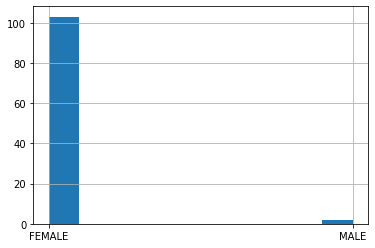

In [123]:
clinical['Gender'].hist()

<AxesSubplot:>

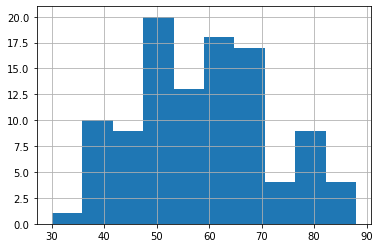

In [125]:
clinical['Age at Initial Pathologic Diagnosis'].hist()

<AxesSubplot:>

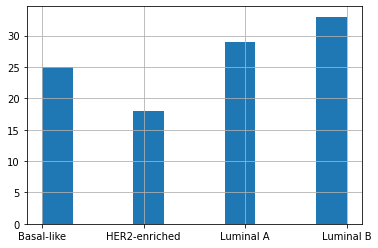

In [126]:
clinical['PAM50 mRNA'].hist()

<AxesSubplot:>

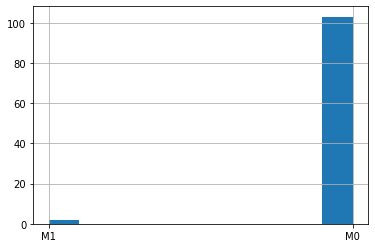

In [127]:
clinical['Metastasis'].hist()

<AxesSubplot:>

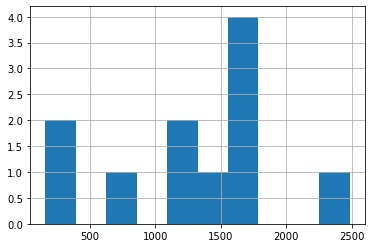

In [129]:
clinical['Days to date of Death'].hist()

In [120]:
f = clinical['Gender']=='FEMALE'
f.sum()

103

In [115]:
a = clinical.groupby(['Gender', 'Age at Initial Pathologic Diagnosis']).mean()

Days to Date of Last Contact  \
Gender Age at Initial Pathologic Diagnosis                                 
FEMALE 30                                                     713.000000   
       36                                                     780.000000   
       37                                                     569.000000   
       38                                                     133.000000   
       39                                                    2850.000000   
       40                                                    1290.000000   
       41                                                     677.333333   
       43                                                     799.333333   
       44                                                     387.000000   
       45                                                     509.666667   
       46                                                     274.500000   
       48                                                    1036.800000   
       49                                                     654.500000   
       50                                                     729.666667   
       51                                                    1186.500000   
       52                                                     403.800000   
       53                                                    1683.000000   
       54                                                     986.400000   
       55                                                     173.333333   
       56                                                     848.500000   
       57                                                     359.000000   
       59                                                    1266.666667   
       60                                                     643.000000   
       61                                                    1122.666667   
       62                                                     669.000000   
       63                                                    1264.333333   
       64                                                     997.000000   
       65                                                     743.000000   
       66                                                     631.400000   
       67                                                     477.666667   
       68                                                     429.666667   
       69                                                     633.500000   
       70                                                       9.000000   
       72                                                    1317.000000   
       74                                                     425.000000   
       76                                                    1134.000000   
       78                                                     759.500000   
       79                                                     121.500000   
       80                                                    1091.500000   
       81                                                     178.000000   
       82                                                     682.000000   
       84                                                     518.500000   
       88                                                     680.000000   
MALE   58                                                    1393.000000   
       68                                                    1295.000000   

                                            Days to date of Death  OS event  \
Gender Age at Initial Pathologic Diagnosis                                    
FEMALE 30                                                     NaN  0.000000   
       36                                                     NaN  0.000000   
       37                                                     NaN  0.000000   
       38                                                     NaN  0.000000 

In [134]:
count = clinical.groupby(['Gender', 'Age at Initial Pathologic Diagnosis']).count()
count

ER Status  PR Status  \
Gender Age at Initial Pathologic Diagnosis                         
FEMALE 30                                           1          1   
       36                                           2          2   
       37                                           1          1   
       38                                           1          1   
       39                                           1          1   
       40                                           2          2   
       41                                           3          3   
       43                                           3          3   
       44                                           1          1   
       45                                           3          3   
       46                                           2          2   
       48                                           5          5   
       49                                           2          2   
       50                                           3          3   
       51                                           2          2   
       52                                           5          5   
       53                                           3          3   
       54                                           5          5   
       55                                           3          3   
       56                                           2          2   
       57                                           2          2   
       59                                           3          3   
       60                                           1          1   
       61                                           3          3   
       62                                           4          4   
       63                                           3          3   
       64                                           4          4   
       65                                           2          2   
       66                                           5          5   
       67                                           3          3   
       68                                           3          3   
       69                                           2          2   
       70                                           1          1   
       72                                           1          1   
       74                                           1          1   
       76                                           2          2   
       78                                           2          2   
       79                                           2          2   
       80                                           2          2   
       81                                           1          1   
       82                                           2          2   
       84                                           2          2   
       88                                           2          2   
MALE   58                                           1          1   
       68                                           1          1   

                                            HER2 Final Status  Tumor  \
Gender Age at Initial Pathologic Diagnosis                             
FEMALE 30                                                   1      1   
       36                                                   2      2   
       37                                                   1      1   
       38                                                   1      1   
       39                                                   1      1   
       40                                                   2      2   
       41                                                   3      3   
       43                                                   3      3   
       44                                                   1      1   
       45                                              

<AxesSubplot:>

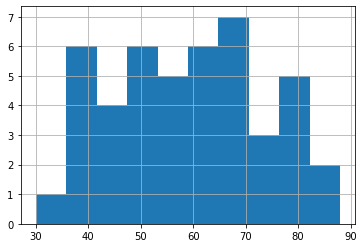

In [145]:
count1 = count.reset_index(level=[1])
count1['Age at Initial Pathologic Diagnosis'].hist()

In [29]:
clinical = clinical.loc[[x for x in clinical.index.tolist() if x in df_proteomes.index],:] 
# удаляем клинические записи для образцов, не входящих в наш набор данных по белкам

In [30]:
clinical

,Gender,Age at Initial Pathologic Diagnosis,ER Status,PR Status,HER2 Final Status,Tumor,Tumor--T1 Coded,Node,Node-Coded,Metastasis,...,PAM50 mRNA,SigClust Unsupervised mRNA,SigClust Intrinsic mRNA,miRNA Clusters,methylation Clusters,RPPA Clusters,CN Clusters,Integrated Clusters (with PAM50),Integrated Clusters (no exp),Integrated Clusters (unsup exp)
Complete TCGA ID,,,,,,,,,,,,,,,,,,,,,
TCGA-A2-A0CM,FEMALE,40,Negative,Negative,Negative,T2,T_Other,N0,Negative,M0,...,Basal-like,-12,-13,4,4,Basal,4,2,1,1
TCGA-BH-A18Q,FEMALE,56,Negative,Negative,Negative,T2,T_Other,N1,Positive,M0,...,Basal-like,-12,-13,5,5,Basal,1,2,2,2
TCGA-A7-A0CE,FEMALE,57,Negative,Negative,Negative,T2,T_Other,N0,Negative,M0,...,Basal-like,0,-13,5,5,Basal,1,2,2,2
TCGA-D8-A142,FEMALE,74,Negative,Negative,Negative,T3,T_Other,N0,Negative,M0,...,Basal-like,0,-13,3,5,X,1,2,2,2
TCGA-AO-A0J6,FEMALE,61,Negative,Negative,Negative,T2,T_Other,N0,Negative,M0,...,Basal-like,-12,-13,2,5,Basal,1,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-AR-A1AV,MALE,68,Positive,Positive,Negative,T2,T_Other,N1,Positive,M0,...,Luminal B,-5,-2,7,3,LumA/B,3,4,4,5
TCGA-BH-A0C7,FEMALE,48,Positive,Negative,Positive,T2,T_Other,N1,Positive,M0,...,Luminal B,-3,0,4,4,LumA/B,5,4,1,3
TCGA-BH-A0DD,MALE,58,Positive,Positive,Positive,T2,T_Other,N1,Positive,M0,...,Luminal B,-3,-6,4,4,LumA/B,3,4,1,3


In [33]:
processed  = df_proteomes.merge(clinical,left_index=True,right_index=True) 
#соединяем (джойним) таблицу с клиническими данными к данным о белках

In [34]:
processed 

,NP_958782,NP_958785,NP_958786,NP_000436,NP_958781,NP_958780,NP_958783,NP_958784,NP_112598,NP_001611,...,PAM50 mRNA,SigClust Unsupervised mRNA,SigClust Intrinsic mRNA,miRNA Clusters,methylation Clusters,RPPA Clusters,CN Clusters,Integrated Clusters (with PAM50),Integrated Clusters (no exp),Integrated Clusters (unsup exp)
TCGA-A2-A0CM,0.683404,0.694424,0.698098,0.687077,0.687077,0.698098,0.698098,0.698098,-2.652150,-0.984373,...,Basal-like,-12,-13,4,4,Basal,4,2,1,1
TCGA-A2-A0D2,0.107491,0.104164,0.107491,0.097512,0.104164,0.104164,0.104164,0.104164,-0.880454,-1.512473,...,Basal-like,-12,-13,4,5,Basal,3,2,2,2
TCGA-A2-A0EQ,-0.912670,-0.927979,-0.927979,-0.931806,-0.927979,-0.927979,-0.927979,-0.927979,-3.071151,-2.278943,...,HER2-enriched,-5,-2,5,4,Basal,4,4,1,1
TCGA-A2-A0EV,0.452986,0.472590,0.472590,0.458587,0.472590,0.472590,0.472590,0.472590,-0.742871,1.811277,...,Luminal A,-4,0,4,2,ReacI,3,3,3,4
TCGA-A2-A0EX,1.185108,1.192612,1.188860,1.185108,1.200116,1.188860,1.188860,1.192612,1.046289,2.138081,...,Luminal A,-7,-5,4,4,ReacI,4,3,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-C8-A138,2.765081,2.779709,2.779709,2.797995,2.787023,2.779709,2.783366,2.783366,2.205538,0.749997,...,HER2-enriched,-5,-2,1,2,Basal,2,1,3,2
TCGA-D8-A142,0.538596,0.542211,0.542211,0.534981,0.542211,0.542211,0.542211,0.542211,-0.148205,0.267490,...,Basal-like,0,-13,3,5,X,1,2,2,2
TCGA-E2-A154,0.862659,0.870186,0.870186,0.866423,0.870186,0.870186,0.870186,0.870186,1.920171,2.349197,...,Luminal A,-3,-12,6,4,LumA,2,3,3,3
TCGA-E2-A158,-1.086529,-1.095492,-1.095492,-1.095492,-1.095492,-1.093252,-1.093252,-1.093252,0.096627,-1.149272,...,Basal-like,0,-13,5,5,Basal,1,2,2,2


In [35]:
processed_numerical = processed.loc[:,[x for x in processed.columns if bool(re.search("NP_|XP_",x)) == True]]
#оставляем числовые данные для анализа

In [36]:
processed_numerical

,NP_958782,NP_958785,NP_958786,NP_000436,NP_958781,NP_958780,NP_958783,NP_958784,NP_112598,NP_001611,...,NP_001193600,NP_061134,NP_932347,NP_003593,NP_997203,NP_001191293,NP_775791,NP_004065,NP_068752,NP_219494
TCGA-A2-A0CM,0.683404,0.694424,0.698098,0.687077,0.687077,0.698098,0.698098,0.698098,-2.652150,-0.984373,...,NaN,NaN,1.153614,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-A2-A0D2,0.107491,0.104164,0.107491,0.097512,0.104164,0.104164,0.104164,0.104164,-0.880454,-1.512473,...,0.919136,-1.648856,0.832649,NaN,-8.324969,-4.679219,NaN,-1.106650,NaN,-6.941181
TCGA-A2-A0EQ,-0.912670,-0.927979,-0.927979,-0.931806,-0.927979,-0.927979,-0.927979,-0.927979,-3.071151,-2.278943,...,-0.801685,NaN,NaN,3.802310,-6.373934,-1.123160,NaN,NaN,NaN,NaN
TCGA-A2-A0EV,0.452986,0.472590,0.472590,0.458587,0.472590,0.472590,0.472590,0.472590,-0.742871,1.811277,...,-4.966177,-1.471027,NaN,-0.474013,-12.278546,-10.337729,-0.653251,NaN,NaN,NaN
TCGA-A2-A0EX,1.185108,1.192612,1.188860,1.185108,1.200116,1.188860,1.188860,1.192612,1.046289,2.138081,...,1.451490,-2.018981,0.877456,NaN,NaN,-6.101005,NaN,-1.726336,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-C8-A138,2.765081,2.779709,2.779709,2.797995,2.787023,2.779709,2.783366,2.783366,2.205538,0.749997,...,-3.250913,1.711825,-0.248402,NaN,4.707022,4.107251,-3.203370,1.971481,NaN,NaN
TCGA-D8-A142,0.538596,0.542211,0.542211,0.534981,0.542211,0.542211,0.542211,0.542211,-0.148205,0.267490,...,-5.107629,-0.975980,NaN,2.508629,-12.337110,-9.546530,-4.066584,NaN,NaN,NaN
TCGA-E2-A154,0.862659,0.870186,0.870186,0.866423,0.870186,0.870186,0.870186,0.870186,1.920171,2.349197,...,-3.386203,-2.328692,-2.806642,NaN,-4.733495,-9.584499,-4.786183,-3.103949,NaN,NaN
TCGA-E2-A158,-1.086529,-1.095492,-1.095492,-1.095492,-1.095492,-1.093252,-1.093252,-1.093252,0.096627,-1.149272,...,-0.638364,0.051811,2.509998,7.067839,NaN,0.378972,NaN,NaN,0.665797,NaN


In [40]:
processed_numerical_p50 = processed_numerical.loc[:,processed_numerical.columns.isin(pam50['RefSeqProteinID'])]
#Выберите только белки PAM50, используемая для предсказания подтипа рака молочной железы

In [41]:
processed_numerical_p50

,NP_057427,NP_002408,NP_000415,NP_000413,NP_000517,NP_004439,NP_005219,NP_058519,NP_058518,NP_001116539,...,NP_057547,NP_054895,NP_001246,NP_055606,NP_036451,NP_000624,NP_569082,NP_001159,NP_001229,NP_002458
TCGA-A2-A0CM,2.160157,2.623021,4.768355,0.639321,4.933663,-4.419112,-0.271711,-6.013418,-6.013418,-6.318320,...,-1.292949,3.541400,3.177722,NaN,-1.792547,NaN,NaN,2.516489,2.556897,NaN
TCGA-A2-A0D2,2.249702,3.576941,2.169868,2.968207,0.543251,-5.421010,-1.206443,-5.297932,-5.277974,-5.311238,...,-3.694601,2.495856,2.722053,0.373604,-1.342826,-4.183584,-2.889608,3.487128,NaN,-0.714133
TCGA-A2-A0EQ,-0.020957,1.884936,-7.407249,-7.675146,-5.187535,-2.795601,7.158672,-9.114133,-8.762041,-9.573385,...,-1.410193,0.702364,-1.402538,NaN,NaN,1.934688,NaN,0.798041,2.003576,NaN
TCGA-A2-A0EV,-1.364604,-2.246793,-3.750716,-3.882344,-2.252395,-3.252209,-1.574649,-2.190781,-2.871327,-2.190781,...,0.018893,-1.574649,-4.515280,NaN,NaN,2.049328,NaN,-0.266769,-3.201798,-7.724769
TCGA-A2-A0EX,-2.506723,-2.953194,-0.803378,-2.315378,-0.098028,-1.643795,-1.212331,4.186597,3.976493,3.942726,...,-0.822137,-2.938187,-3.395914,-1.827636,0.082061,0.044543,-2.079011,-3.046991,2.554537,-0.443199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-C8-A138,-0.409316,0.739026,0.943825,1.415596,1.806910,-0.504402,-2.625542,-5.284283,-4.907597,-5.309883,...,-0.248402,-0.295945,-2.307371,4.641193,-1.799029,NaN,NaN,-2.076972,-0.851830,1.554568
TCGA-D8-A142,-0.415696,-1.232627,-2.823113,1.724231,0.668726,-3.130366,-0.462687,-6.427009,-6.195666,-6.427009,...,-2.320664,-1.232627,-1.438667,NaN,NaN,-0.910915,NaN,-0.075910,-0.101213,-7.659635
TCGA-E2-A154,-2.742664,-3.307172,-5.903908,-5.218972,-4.650701,-3.894260,-3.284592,2.861017,3.098110,2.981445,...,-0.202379,-2.772771,-6.268957,1.340609,1.826086,NaN,NaN,0.395999,-3.962001,-7.804418
TCGA-E2-A158,-0.781777,-1.588474,-3.732945,0.701651,0.213150,-2.531862,-0.277591,-4.456732,-4.665129,-4.665129,...,-2.155403,-0.183476,-0.732478,NaN,-0.611474,0.690446,NaN,NaN,3.240507,-2.090419


In [54]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(processed_numerical_p50)
processed_numerical_p50 = imputer.transform(processed_numerical_p50)
#заполняем пропуски

In [55]:
processed_numerical_p50

array([[ 2.16015744,  2.62302061,  4.76835465, ...,  2.51648861,
         2.5568973 , -2.57489594],
       [ 2.24970172,  3.57694103,  2.16986778, ...,  3.48712784,
         0.66671531, -0.71413343],
       [-0.0209573 ,  1.88493566, -7.40724933, ...,  0.79804088,
         2.00357559, -2.57489594],
       ...,
       [-2.74266425, -3.30717211, -5.90390825, ...,  0.39599944,
        -3.96200122, -7.80441803],
       [-0.78177666, -1.58847422, -3.73294524, ..., -0.20706759,
         3.24050703, -2.09041937],
       [ 0.22965842, -0.44137307, -1.18398126, ..., -0.20706759,
         1.85802818, -4.31546156]])

In [56]:
n_clusters = [2,3,4,5,6,7,8,10,20,79]
#Проверьте, какое количество кластеров работает лучше всего, 20 и 79 просто для развлечения и сравнения.

In [69]:
def compare_k_means(k_list,df_proteomes):
    #Запускаем кластеризацию с разными k и проверяем метрики
    for k in k_list:
        clusterer = KMeans(n_clusters=k, n_jobs=4)
        clusterer.fit(df_proteomes)
        print("Silhouette Coefficient for k == %s: %s" % (
        k, round(metrics.silhouette_score(df_proteomes, clusterer.labels_), 4)))
        print("Homogeneity score for k == %s: %s" % (
        k, round(metrics.homogeneity_score(processed['PAM50 mRNA'], clusterer.labels_),4)))
        print("------------------------")




processed_numerical_random = processed_numerical.iloc[:,np.random.choice(range(processed_numerical.shape[1]),43)]
#создали массив из 43 случайных белков 
imputer_rnd = imputer.fit(processed_numerical_random)
processed_numerical_random = imputer_rnd.transform(processed_numerical_random)

#Проверьте разное количество кластеров для белков PAM50, в этих данных есть 4 подтипа рака
# 3 образца здоровых пациентов были отброшены в начале...
 

compare_k_means(n_clusters,processed_numerical_p50)
#  k==3 работает хорошо, оценка  высока, а оценка однородности подскакивает примерно в 2 раза
# k == 79 имеет показатель гомогенности 1,0, что неудивительно, поскольку алгоритм может назначать всем точкам отдельные кластеры!
#  для нашего приложения такая кластеризация бесполезна.
 

Silhouette Coefficient for k == 2: 0.2111
Homogeneity score for k == 2: 0.2073
------------------------
Silhouette Coefficient for k == 3: 0.1763
Homogeneity score for k == 3: 0.4138
------------------------
Silhouette Coefficient for k == 4: 0.129
Homogeneity score for k == 4: 0.5156
------------------------
Silhouette Coefficient for k == 5: 0.1422
Homogeneity score for k == 5: 0.5652
------------------------
Silhouette Coefficient for k == 6: 0.1301
Homogeneity score for k == 6: 0.5203
------------------------
Silhouette Coefficient for k == 7: 0.1015
Homogeneity score for k == 7: 0.5314
------------------------
Silhouette Coefficient for k == 8: 0.0962
Homogeneity score for k == 8: 0.5989
------------------------
Silhouette Coefficient for k == 10: 0.0933
Homogeneity score for k == 10: 0.5956
------------------------
Silhouette Coefficient for k == 20: 0.0866
Homogeneity score for k == 20: 0.7005
------------------------
Silhouette Coefficient for k == 79: 0.0084
Homogeneity score 

In [70]:
# Использовать случайные белки для сравнения
compare_k_means(n_clusters,processed_numerical_random)
# Показатели должны быть значительно ниже, чем для белков PAM50!

Silhouette Coefficient for k == 2: 0.1927
Homogeneity score for k == 2: 0.0091
------------------------
Silhouette Coefficient for k == 3: 0.1238
Homogeneity score for k == 3: 0.0274
------------------------
Silhouette Coefficient for k == 4: 0.0783
Homogeneity score for k == 4: 0.0649
------------------------
Silhouette Coefficient for k == 5: 0.0859
Homogeneity score for k == 5: 0.0552
------------------------
Silhouette Coefficient for k == 6: 0.0812
Homogeneity score for k == 6: 0.0925
------------------------
Silhouette Coefficient for k == 7: 0.0596
Homogeneity score for k == 7: 0.1415
------------------------
Silhouette Coefficient for k == 8: 0.079
Homogeneity score for k == 8: 0.0992
------------------------
Silhouette Coefficient for k == 10: 0.0489
Homogeneity score for k == 10: 0.1977
------------------------
Silhouette Coefficient for k == 20: 0.0586
Homogeneity score for k == 20: 0.3816
------------------------
Silhouette Coefficient for k == 79: 0.0051
Homogeneity score 

<AxesSubplot:ylabel='Patient'>

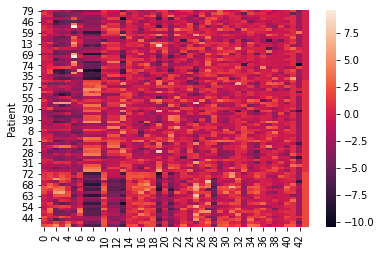

In [68]:
# Визуализируйте данные, используя k==3 
# строим  тепловую карту экспрессии белков для используемых белков PAM50 (в наших данных  43)

clusterer_final = KMeans(n_clusters=3, n_jobs=4)
clusterer_final = clusterer_final.fit(processed_numerical_p50)
processed_p50_plot = pd.DataFrame(processed_numerical_p50)
processed_p50_plot['KMeans_cluster'] = clusterer_final.labels_
processed_p50_plot.sort_values('KMeans_cluster',axis=0,inplace=True)
# Посмотрите на тепловую карту экспрессии белка у всех пациентов и посмотрите на назначенный им кластер
# Поскольку каждый белок выполняет в клетке определенную функцию, их уровни описывают состояние, в котором находится клетка.
 

processed_p50_plot.index.name = 'Patient'
sns.heatmap(processed_p50_plot) 
# По оси x отложены белки PAM50, которые мы использовали, y – это маркер кластера.
# Каждый кластер означает разные молекулярные сигнатуры для каждого пациента. Для таких пациентов доступны различные варианты лечения.
